## Import required packages

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import time

from datetime import datetime
from collections import Counter
from pandas.plotting import autocorrelation_plot as acp
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller


## Import data and perform necessary pre-processing

In [5]:
uber_jan_june = pd.read_csv('../input/uber-raw-data-janjune-15.csv')
print (uber_jan_june.head())
uber_jan_june.shape

  Dispatching_base_num          Pickup_date Affiliated_base_num  locationID
0               B02617  2015-05-17 09:47:00              B02617         141
1               B02617  2015-05-17 09:47:00              B02617          65
2               B02617  2015-05-17 09:47:00              B02617         100
3               B02617  2015-05-17 09:47:00              B02774          80
4               B02617  2015-05-17 09:47:00              B02617          90


(14270479, 4)

In [6]:
## Extracting month and day from date-time
uber_jan_june['Month_Day'] = uber_jan_june['Pickup_date'].apply(lambda pickup: datetime.strptime(pickup, '%Y-%m-%d %H:%M:%S').strftime('%m-%d').split('-'))

In [7]:
## Separate month and day
uber_jan_june['Month'] = [month_day [0] for month_day in uber_jan_june['Month_Day']]
uber_jan_june['Day'] = [month_day [1] for month_day in uber_jan_june['Month_Day']]
uber_jan_june.tail(20)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month_Day,Month,Day
14270459,B02765,2015-05-08 15:40:00,B02765,186,"[05, 08]",05,08
14270460,B02765,2015-05-08 15:41:00,B02764,50,"[05, 08]",05,08
14270461,B02765,2015-05-08 15:41:00,B02253,13,"[05, 08]",05,08
14270462,B02765,2015-05-08 15:41:00,B02682,192,"[05, 08]",05,08
14270463,B02765,2015-05-08 15:41:00,B02345,262,"[05, 08]",05,08
14270464,B02765,2015-05-08 15:41:00,B02765,237,"[05, 08]",05,08
14270465,B02765,2015-05-08 15:41:00,B02765,233,"[05, 08]",05,08
14270466,B02765,2015-05-08 15:41:00,B02765,148,"[05, 08]",05,08
14270467,B02765,2015-05-08 15:41:00,B02765,33,"[05, 08]",05,08
14270468,B02765,2015-05-08 15:42:00,B02096,232,"[05, 08]",05,08


In [8]:
## Group the data based on month and day
jan_june_grouped = uber_jan_june.groupby(by = ['Month', 'Day']).size().unstack()
jan_june_grouped

Day,01,02,03,04,05,06,07,08,09,10,...,22,23,24,25,26,27,28,29,30,31
Month,,,,,,,,,,,,,,,,,,,,,
01,58045.0,40287.0,59844.0,41943.0,43678.0,53539.0,63375.0,73016.0,72124.0,80656.0,...,66819.0,73363.0,82588.0,59382.0,44310.0,25954.0,61626.0,70441.0,85565.0,94448.0
02,78592.0,70193.0,71532.0,68237.0,82336.0,87568.0,82752.0,64327.0,63306.0,66197.0,...,67844.0,72494.0,80520.0,75992.0,84840.0,90217.0,89716.0,NaN,NaN,NaN
03,70839.0,57460.0,75048.0,71931.0,77446.0,83134.0,81468.0,61824.0,53920.0,72185.0,...,69337.0,60498.0,64400.0,73953.0,78552.0,84977.0,92527.0,75648.0,62780.0,78893.0
04,69223.0,74069.0,75983.0,69189.0,58357.0,53565.0,68079.0,72023.0,77520.0,81439.0,...,82124.0,92110.0,99688.0,106270.0,88673.0,64783.0,68863.0,75940.0,84330.0,NaN
05,92329.0,104978.0,80300.0,65447.0,76195.0,80447.0,87361.0,90733.0,98359.0,80146.0,...,85771.0,78343.0,68328.0,59748.0,72820.0,88662.0,95074.0,98200.0,104429.0,96947.0
06,93499.0,97592.0,87206.0,95023.0,101922.0,101773.0,88876.0,76899.0,82463.0,87403.0,...,75418.0,93172.0,91388.0,100073.0,99508.0,136193.0,93108.0,74430.0,82627.0,NaN


In [9]:
## Aggregate results to form a time-series
all_jan_june = [jan_june_grouped.iloc[r,:] for r in range(jan_june_grouped.shape[0])]
all_jan_june = [trips for month in all_jan_june for trips in month]
len(all_jan_june)

186

In [10]:
## Remove missing values: here missing values are the days when a month is shorter than 31 days.
remove_inds = list(np.argwhere(np.isnan(all_jan_june) == True).reshape((1,5))[0])
all_jan_june_mod = [all_jan_june[i] for i,j in enumerate(all_jan_june) if i not in remove_inds]

In [11]:
print (len(all_jan_june_mod))

181


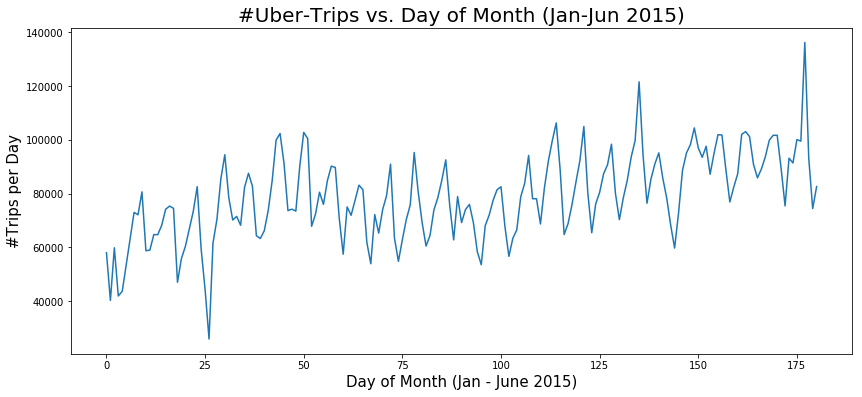

In [12]:
## Plot the actual time-series
fig, ax = plt.subplots(figsize = (14,6))
ax.plot(all_jan_june_mod)
ax.set_xlabel('Day of Month (Jan - June 2015)', fontsize = 15)
ax.set_ylabel('#Trips per Day', fontsize = 15)
ax.set_title('#Uber-Trips vs. Day of Month (Jan-Jun 2015)', fontsize = 20)
plt.show()

In [13]:
## Convert time-series into data-frame for modeling process
uber_jan_june_final = pd.DataFrame({'Days': range(1,len(all_jan_june_mod)+1), 'Trips': all_jan_june_mod})
uber_jan_june_final.head()

,Days,Trips
0,1,58045.0
1,2,40287.0
2,3,59844.0
3,4,41943.0
4,5,43678.0


## Do one-differencing and check for: Rolling mean and SD, Autocorrelation, and Partial Autocorrelation

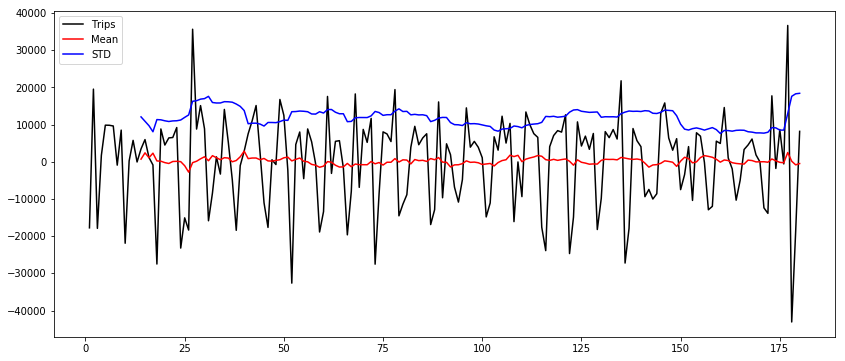

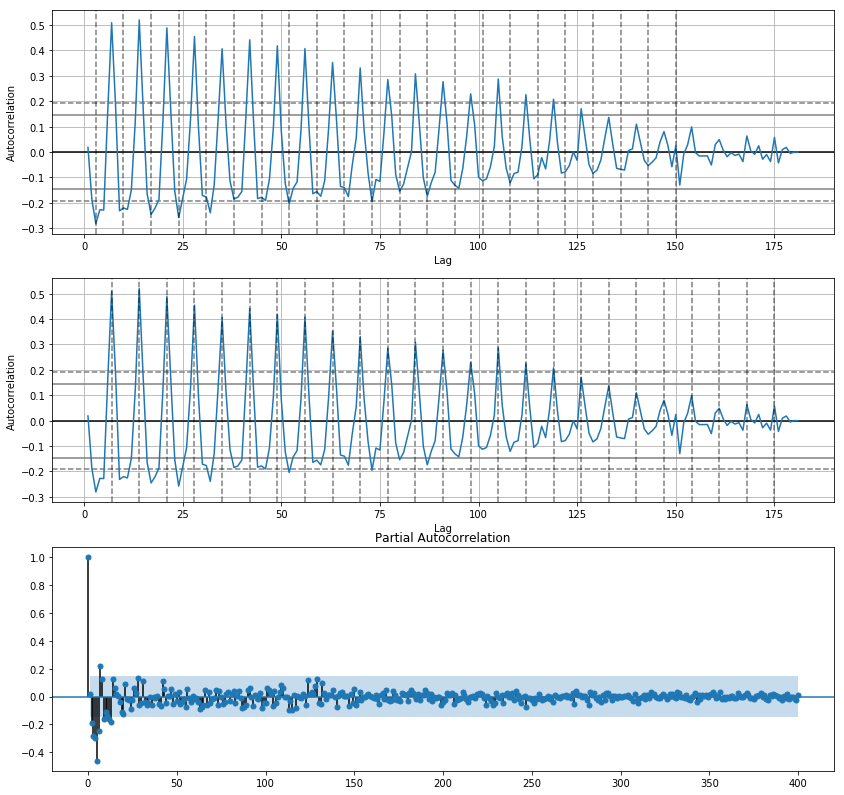

In [14]:
# log_all_trips_df = np.log(uber_jan_june_final[['Trips']])
# log_all_trips_df_diff = log_all_trips_df - log_all_trips_df.shift()

## Do differencing
all_trips_df_diff = uber_jan_june_final[['Trips']] - uber_jan_june_final[['Trips']].shift()

## Plot the new time-series and check  for rolling mean and SD
fig, ax = plt.subplots(figsize = (14, 6))
all_trips_df_diff.plot(ax = ax, color = 'k')
r2 = all_trips_df_diff.rolling(window = 14)
r2.mean()['Trips'].plot(color = 'red', ax = ax, label = 'Mean')
r2.std()['Trips'].plot(color = 'blue', ax = ax, label = 'STD')
ax.legend()

## Plot auto-correlation and partial auto-correlation
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (14,14), nrows = 3)

all_trips_df_diff.fillna(0, inplace = True)
acp(all_trips_df_diff, ax = ax1)
for i in range(3,153,7):
    ax1.axvline(x = i, linestyle = 'dashed', color = 'k', alpha = 0.5)

acp(all_trips_df_diff, ax = ax2)

for i in range(7,177,7):
    ax2.axvline(x = i, linestyle = 'dashed', color = 'k', alpha = 0.5)

plot_pacf(all_trips_df_diff, ax = ax3, lags = 400)

ax.legend()

plt.show()

## Test for stationarity and train-test split

In [15]:
from statsmodels.tsa.stattools import adfuller
train_jan_june = all_trips_df_diff['Trips'][0:167]
test_jan_june = all_trips_df_diff['Trips'][167:]

imp_stats = list(adfuller(train_jan_june, autolag = 'AIC', regression = 'c')[0:4])
values = ['Test-statistic', 'p-Value','#Lags', '#Obs.']
pd.DataFrame({'Stats': values, 
              'Values': imp_stats})

,Stats,Values
0,Test-statistic,-5.011743
1,p-Value,0.000021
2,#Lags,13.000000
3,#Obs.,153.000000


## Now that we have stationary time-series, find optimal parameters for ARMA process (The time-series seems to be a mixture of AR and MA)

In [16]:
from statsmodels.tsa.arima_model import ARIMA
train_temp = pd.DataFrame({'original_series': uber_jan_june_final['Trips'][0:167], 'shifted_series': all_trips_df_diff['Trips'][0:167]})

def fit_ARIMA(train, temp):
    p_all = []
    q_all = []
    rmse_train = []
    predictions = []
    
    for p in range(6):        
        for q in range(6):
            try: 
                model = ARIMA(np.array(train), order = (p,0,q))
                results_arima = model.fit()                    
                fitted_values = results_arima.fittedvalues

                p_all.append(p)
                q_all.append(q)

                Back_to_original = [temp['shifted_series'][i+1] + temp['original_series'][i] for i in range(temp.shape[0]-1)]

                ## Add first element as 0:
                Back_to_original.insert(0,0)

                back_to_actual_fitted_values = [fitted_values[i+1] + temp['original_series'][i] for i in range(temp.shape[0]-1)]
                back_to_actual_fitted_values.insert(0,0)
                predictions.append(back_to_actual_fitted_values)
                
                rmse = np.sqrt(np.mean((temp['original_series'][1:] - back_to_actual_fitted_values[1:])**2))
                rmse_train.append(np.ceil(rmse))

            except:
                pass
                
    
    grid_search_df = pd.DataFrame({'p': p_all, 'q': q_all, 'RMSE_train': rmse_train, 'Predictions': predictions})
    
    return grid_search_df

In [17]:
train_grid_search_df = fit_ARIMA(train_jan_june, train_temp)
train_grid_search_df.sort_values(by = ['RMSE_train']).head()

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

,Predictions,RMSE_train,p,q
29,"[0, 58295.75035572669, 40236.45658062792, 6304...",8074.0,5,5
28,"[0, 58290.01485510374, 40148.09628757005, 6297...",8076.0,5,4
27,"[0, 58285.524480313456, 39362.15551504283, 632...",8522.0,5,3
17,"[0, 58222.410509894136, 38362.83982653833, 636...",8541.0,3,3
14,"[0, 58302.710554906764, 38748.110656150326, 63...",8541.0,2,5


## Check predictions with real values from training data

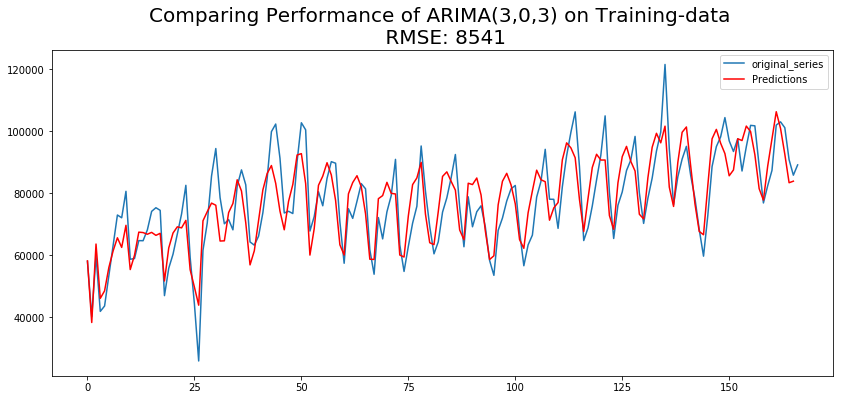

In [18]:
rmse_train = int(train_grid_search_df[(train_grid_search_df['p'] == 3) & (train_grid_search_df['q'] == 3)]['RMSE_train'])
predictions_train = train_grid_search_df[(train_grid_search_df['p'] == 3) & (train_grid_search_df['q'] == 3)]['Predictions'].tolist()[0]

fig, ax = plt.subplots(figsize = (14,6))
ax.plot(train_temp['original_series'])
ax.plot(predictions_train[1:], color = 'red', label = 'Predictions')
ax.set_title('Comparing Performance of ARMA(3,3) on Training-data \n RMSE: {}'.format(rmse_train), fontsize = 20)
ax.legend()
plt.show()

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


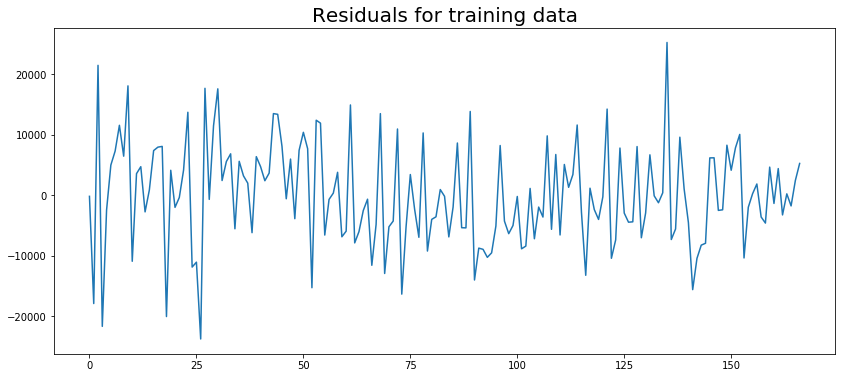

In [20]:
## Plot residuals
model = ARIMA(np.array(train_jan_june), order = (3,0,3)).fit()

## Residuals of training-data
fig, ax = plt.subplots(figsize = (14,6))
ax.plot(model.resid)
ax.set_title('Residuals for training data', fontsize = 20)
ax.legend()
plt.show()

## Check the performance on testing data

In [21]:
fitted_values_test = model.predict(start = 167, end = 180)

temp_test = pd.DataFrame({'original_test_series': uber_jan_june_final['Trips'][167:], 'shifted_series': all_trips_df_diff['Trips'][167:]})
temp_test.reset_index(inplace = True, drop = True)

Back_to_original_test = [temp_test['shifted_series'][i+1] + temp_test['original_test_series'][i] for i in range(temp_test.shape[0]-1)]

## Add first element as 0:
Back_to_original_test.insert(0,0)

temp_test['back_to_original_test'] = Back_to_original_test
temp_test['arma_fitted_values_test'] = fitted_values_test

back_to_actual_fitted_values = [temp_test['arma_fitted_values_test'][i+1] + temp_test['original_test_series'][i] for i in range(temp_test.shape[0]-1)]
back_to_actual_fitted_values.insert(0,0)
temp_test['back_to_actual_fitted_values_test'] = back_to_actual_fitted_values

rmse_test = np.sqrt(np.mean((temp_test['original_test_series'][1:] - temp_test['back_to_actual_fitted_values_test'][1:])**2))
rmse_test

16340.733016301114

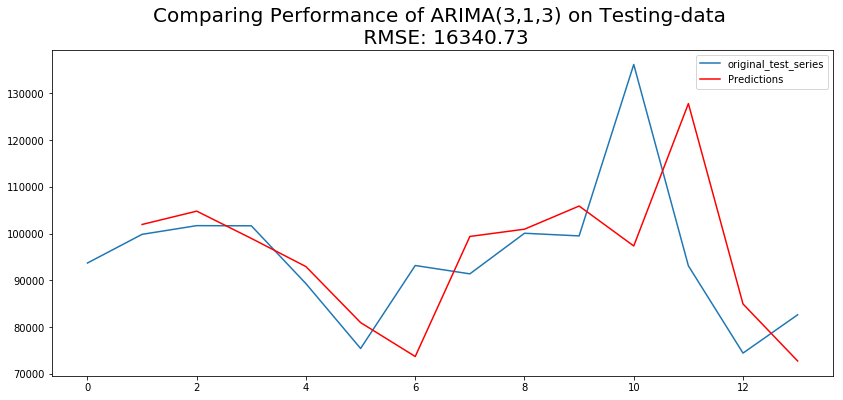

In [22]:
fig, ax = plt.subplots(figsize = (14,6))
ax.plot(temp_test['original_test_series'])
ax.plot(temp_test['back_to_actual_fitted_values_test'][1:], color = 'red', label = 'Predictions')
ax.set_title('Comparing Performance of ARMA(3,3) on Testing-data \n RMSE: {}'.format(np.round(rmse_test,2)), fontsize = 20)
ax.legend()
plt.show()

## Setting up LSTM:

> For each prediction in LSTM, the i/p is #Uber-trips for last 14 days. Using those values, it predicts #Uber-trips for 15th day.

> I make the forecast for last two weeks of June-2015 in this model (same as ARMA)

### Data Pre-processing:

In [23]:
from sklearn.preprocessing import MinMaxScaler

## Split into train-test set:
train_jan_june = uber_jan_june_final.iloc[0:167,1:2].values
test_jan_june = uber_jan_june_final.iloc[167:,1:2].values

print ('Training data: ', train_jan_june.shape)
print ('Testing data: ', test_jan_june.shape)

## Feature-scaling:
mms = MinMaxScaler(feature_range = (0,1))
train_jan_june_scaled = mms.fit_transform(train_jan_june)

Training data:  (167, 1)
Testing data:  (14, 1)


In [24]:
## Create structured training set: I am considering last two weeks' data to predict the next value, i.e. #Uber-trips. So, need to create a appropriate format of input data.
x_train = []
y_train = []

for rides in range(14, 167):
    x_train.append(train_jan_june_scaled[rides-14:rides,0])
    y_train.append(train_jan_june_scaled[rides,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, newshape = (x_train.shape[0], x_train.shape[1], 1))

### Build RNN:

In [25]:
## Import required modules:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [ ]:
## units = 25, dropout = 0.1, optimizer = adam, epochs = 500
## units = 25, dropout = 0.1, optimizer = rmsprop, epochs = 500
## units = 40, dropout = 0.1, optimizer = adam, epochs = 500
## units = 40, dropout = 0.2, optimizer = adam, epochs = 500
## units = 40, dropout = 0.2, optimizer = adam, epochs = 500
## units = 40, dropout = 0.2, optimizer = adam, epochs = 500/1000, batch_size = 16------best


In [26]:
np.random.seed(11)
t_start = time.time()

def build_rnn(num_units, input_x, input_y, drpout, epochs, size_of_batch, optimizer, loss):
    
    regressor = Sequential()

    ## Adding first LSTM layer:
    regressor.add(LSTM(units = num_units, return_sequences = True, input_shape = (input_x.shape[1],1)))
    regressor.add(Dropout(drpout))

    ## Adding second LSTM layer:
    regressor.add(LSTM(units = num_units, return_sequences = True))
    regressor.add(Dropout(drpout))

    ## Adding third LSTM layer:
    regressor.add(LSTM(units = num_units, return_sequences = True))
    regressor.add(Dropout(drpout))

    ## Adding fourth LSTM layer:
    regressor.add(LSTM(units = num_units, return_sequences = True))
    regressor.add(Dropout(drpout))

    ## Adding fifth LSTM layer:
    regressor.add(LSTM(units = num_units, return_sequences = False))
    regressor.add(Dropout(drpout))

    ## Adding o/p layer:
    regressor.add(Dense(units = 1))

    ## Compiling RNN:
    regressor.compile(optimizer = optimizer, loss = loss)

    ## Fitting RNN to training set:
    regressor.fit(x = input_x, y = input_y, epochs = epochs, batch_size = size_of_batch)

    return regressor
    
regressor = build_rnn(num_units = 40, input_x = x_train, input_y = y_train, drpout = 0.2, epochs = 1000, size_of_batch = 16, optimizer = 'adam', loss = 'mean_squared_error')

print (time.time() - t_start)

Epoch 1/1000
153/153 [==============================] - 5s 36ms/step - loss: 0.1987
Epoch 2/1000
153/153 [==============================] - 1s 7ms/step - loss: 0.0432
Epoch 3/1000
153/153 [==============================] - 1s 7ms/step - loss: 0.0361
Epoch 4/1000
153/153 [==============================] - 1s 7ms/step - loss: 0.0250
Epoch 5/1000
153/153 [==============================] - 1s 8ms/step - loss: 0.0267
Epoch 6/1000
153/153 [==============================] - 1s 8ms/step - loss: 0.0249
Epoch 7/1000
153/153 [==============================] - 1s 8ms/step - loss: 0.0267
Epoch 8/1000
153/153 [==============================] - 1s 8ms/step - loss: 0.0222
Epoch 9/1000
153/153 [==============================] - 1s 8ms/step - loss: 0.0236
Epoch 10/1000
153/153 [==============================] - 1s 8ms/step - loss: 0.0236
Epoch 11/1000
153/153 [==============================] - 1s 7ms/step - loss: 0.0239
Epoch 12/1000
153/153 [==============================] - 1s 8ms/step - loss: 0.0239


## Check the performance on the testing data:

In [27]:
adjusted_inputs = uber_jan_june_final[len(uber_jan_june_final) - len(test_jan_june) - 14:]['Trips'].values
adjusted_inputs = adjusted_inputs.reshape(-1,1)
adjusted_inputs = mms.transform(adjusted_inputs)
adjusted_inputs[0:10]

array([[0.64069119],
       [0.72245641],
       [0.79461942],
       [0.79306089],
       [0.65815926],
       [0.53288077],
       [0.59107978],
       [0.6427518 ],
       [0.79557127],
       [0.80643913]])

In [28]:
x_test = []
for rides in range(14,29):
    x_test.append(adjusted_inputs[rides-14:rides,0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, newshape = (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(15, 14, 1)

In [29]:
pred = regressor.predict(x_test)
pred = mms.inverse_transform(pred)

In [30]:
residuals = pred[0:-1] - test_jan_june
rmse = np.sqrt(np.mean(residuals**2))
rmse

12856.087252977062

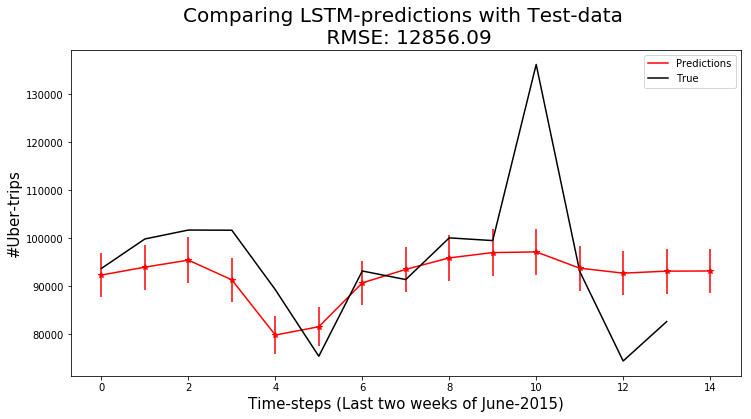

In [31]:
fig, ax = plt.subplots(figsize = (12,6))

e = [i*0.05 for i in pred]
ax.plot(pred, color = 'red', label = 'Predictions')
ax.errorbar(x = range(15), y = pred, yerr = e, fmt = '*', color = 'r')
ax.plot(test_jan_june, color = 'black', label = 'True')

ax.set_xlabel('Time-steps (Last two weeks of June-2015)', fontsize = 15)
ax.set_ylabel('#Uber-trips', fontsize = 15)
ax.set_title('Comparing LSTM-predictions with Test-data \n RMSE: {}'.format(np.round(rmse,2)), fontsize = 20)

ax.legend()
plt.show()

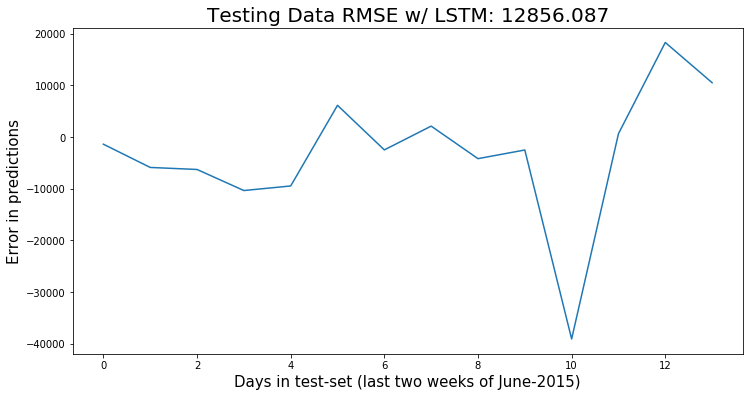

In [32]:
fig ,ax = plt.subplots(figsize = (12,6))
ax.plot(residuals)

ax.set_xlabel('Days in test-set (last two weeks of June-2015)', fontsize = 15)
ax.set_ylabel('Error in predictions', fontsize = 15)
ax.set_title('Testing Data RMSE w/ LSTM: {}'.format(round(rmse, 3)), fontsize = 20)
plt.show()

### Check the performance on the training data:

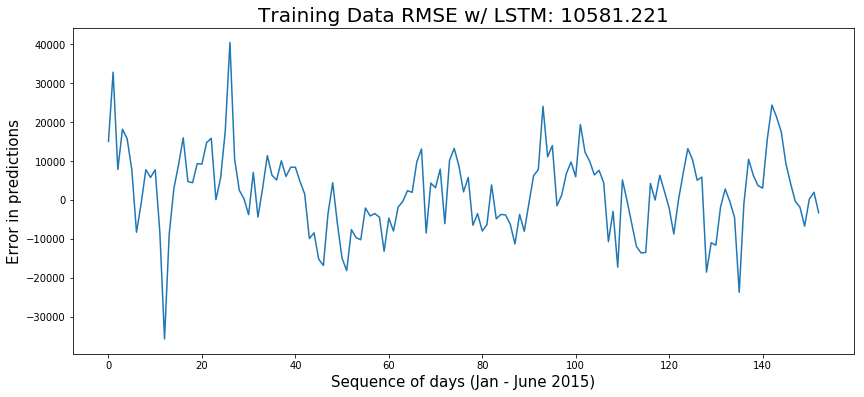

In [33]:
pred_train = regressor.predict(x_train)
pred_train = mms.inverse_transform(pred_train)

residuals_train = pred_train - train_jan_june[0:-14]
rmse_train = np.sqrt(np.mean(residuals_train**2))

fig, ax = plt.subplots(figsize = (14,6))
ax.plot(residuals_train)
ax.set_xlabel('Sequence of days (Jan - June 2015)', fontsize = 15)
ax.set_ylabel('Error in predictions', fontsize = 15)
ax.set_title('Training Data RMSE w/ LSTM: {}'.format(round(rmse_train,3)), fontsize = 20)
plt.show()

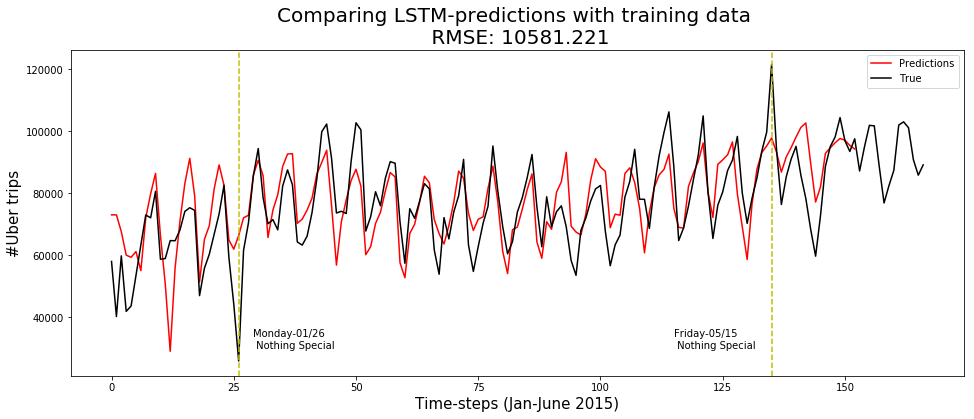

In [34]:
fig, ax = plt.subplots(figsize = (16,6))

ax.plot(pred_train, color = 'red', label = 'Predictions')
ax.plot(train_jan_june, color = 'black', label = 'True')

ax.axvline(x = 26, color = 'y', linestyle = 'dashed')
ax.text(x = 29, y = 30000, s = 'Monday-01/26 \n Nothing Special')

ax.axvline(x = 135, color = 'y', linestyle = 'dashed')
ax.text(x = 115, y = 30000, s = 'Friday-05/15 \n Nothing Special')

ax.set_xlabel('Time-steps (Jan-June 2015)', fontsize = 15)
ax.set_ylabel('#Uber trips', fontsize = 15)
ax.set_title('Comparing LSTM-predictions with training data \n RMSE: {}'.format(round(rmse_train,3)), fontsize = 20)

ax.legend()
plt.show()

## Analysis of residuals

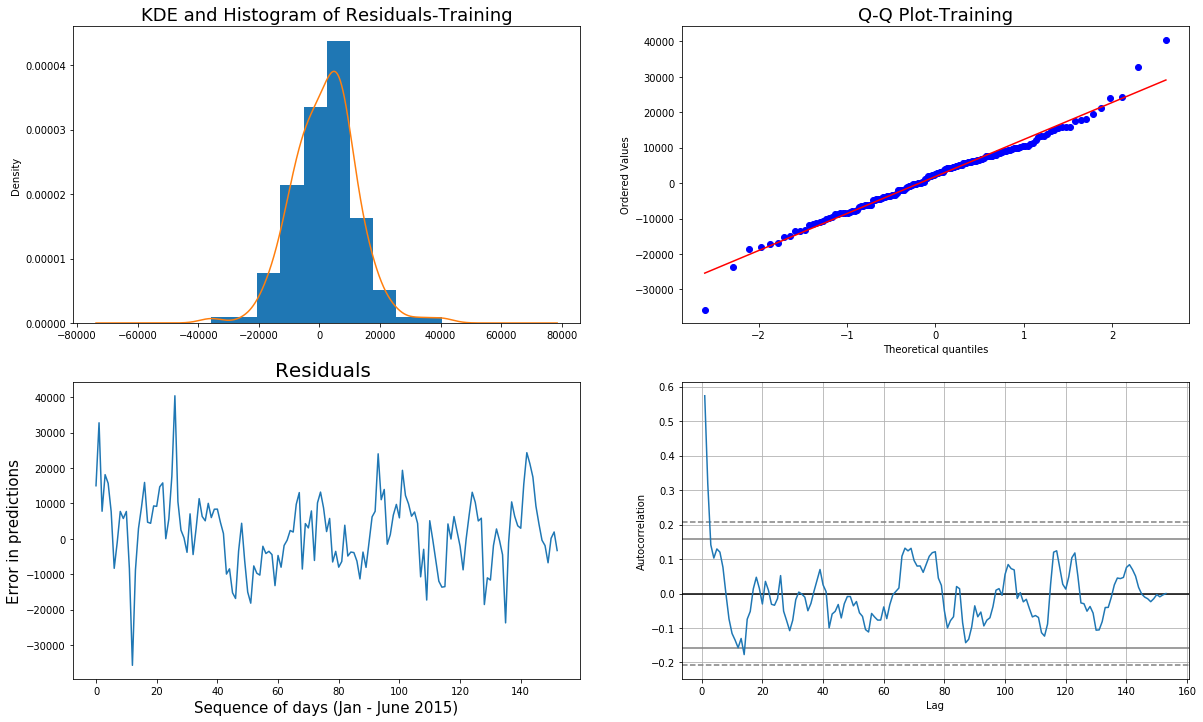

In [35]:
import matplotlib.gridspec as gridspec
plt.figure(figsize = (20,12))
g = gridspec.GridSpec(2,2)

ax1 = plt.subplot(g[0,0])
ax1.hist(residuals_train, normed = True)
pd.DataFrame(residuals_train).plot(kind = 'kde', ax = ax1, label = 'KDE')
ax1.set_title('KDE and Histogram of Residuals-Training', fontsize = 18)
ax1.legend_.remove()

ax2 = plt.subplot(g[0,1])
import scipy.stats as ss
ss.probplot(residuals_train[:,0].tolist(), plot = ax2)
ax2.set_title('Q-Q Plot-Training', fontsize = 18)

ax3 = plt.subplot(g[1,0])
ax3.plot(residuals_train)
ax3.set_xlabel('Sequence of days (Jan - June 2015)', fontsize = 15)
ax3.set_ylabel('Error in predictions', fontsize = 15)
ax3.set_title('Residuals ', fontsize = 20)

ax4 = plt.subplot(g[1,1])
acp(residuals_train, ax = ax4)

plt.show()


### Few notes for LSTM:

**Pros:**

1. From the comparison plot of LSTM vs. True data, we can observe that it does not capture the peaks in #Uber-trips on 10th day (plot of Testing Data). This can be considered a +ve sign in a way that #Uber-trips on that particular day is exceptionally high and can be considered as an anomaly. If we try to fit model for that then it may overfit the data and does not do well for future predictions. Same reason goes for the steep decline in #Uber-trips after the peak!

2. There are certain peaks and steep-decline in #Uber-trips on certain days (plot of Training Data) but further investigation suggests that nothing special happened that day, i.e. no holiday or no special occassion in general. There might be something in NYC only. Our model does not capture this extreme events which is better in a way that it's not over-fitting the data.

**Cons:**

1. RMSE is higher as compared to ARMA model. The RMSE for RNN-LSTM on training is: ~ 10600.

2. It does not tell us the underlying structure (or pattern) of Uber-trips with certainty, i.e. we cannot say when there's peak in #Uber-trips or how does the #Uber-trips vary for a certain week. 

